# 4.3 Random Walks

##  - 4.3: random walks... show that in 2 dimensions the average distance traveled goes like sqrt(N)... what happens with random sized steps?... try different numbers of dimensions.

In [10]:
import math

from typing import List, Tuple

In [11]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [12]:
N_STEP = 30**2

In [13]:
def walk_2d(aN: int, aIsNorm: bool = False) -> List:
    np.random.seed(None)
    x = np.random.uniform(-1, 1, size=aN)
    y = np.random.uniform(-1, 1, size=aN)    

    if aIsNorm:
        L = np.sqrt(x**2+y**2)
        x = x/L
        y = y/L       

    x = [np.float64(0)] + list(np.cumsum(x))
    y = [np.float64(0)] + list(np.cumsum(y))   
    return [x, y]

In [14]:
def tally_walk_distance(aN: int, aIsNorm: bool = False):
    walk = walk_2d(aN, aIsNorm)
    return walk[0][-1]**2 + walk[1][-1]**2

In [15]:
def avg_walk_distance(aExpN: int, aIsNorm: bool = False):
    distances = np.zeros(aExpN+1)

    for n in range(1, aExpN+1):
        k = round(math.sqrt(n))
        trials = [tally_walk_distance(n, aIsNorm) for _ in range(k)]
        distances[n] = np.sum(trials)/k

    return distances

In [16]:
avg_walk_distance(10)

array([0.        , 0.655465  , 1.29834059, 4.40739295, 3.23138195,
       3.94320009, 2.27102406, 1.54869956, 7.7938746 , 6.24645513,
       4.77115773])

## 2D Random Walk Simulations

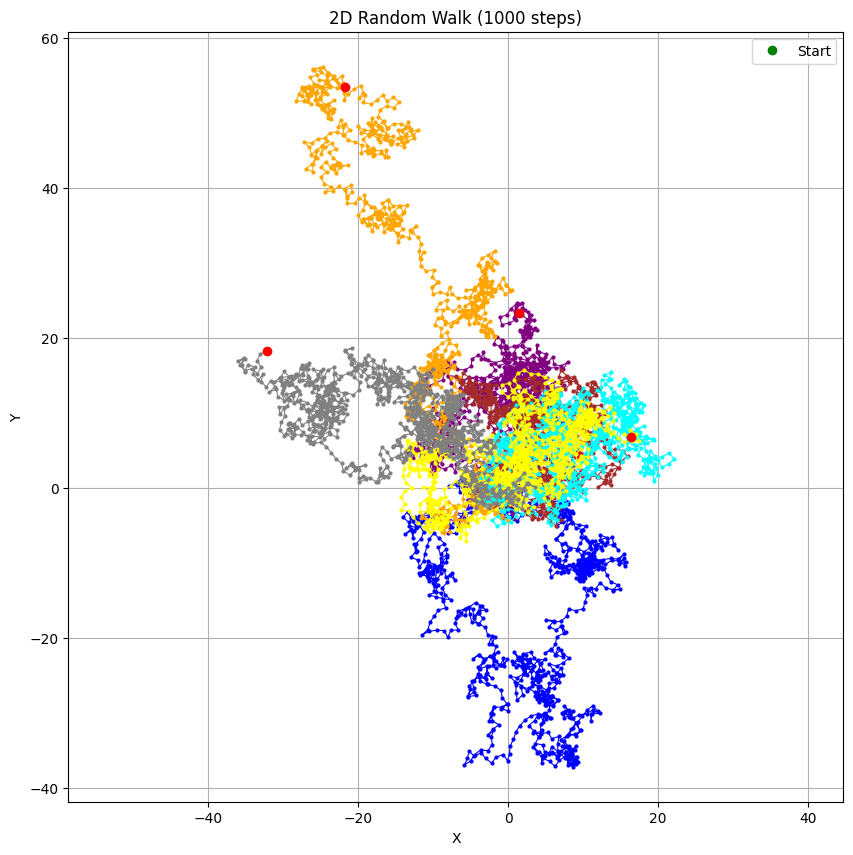

In [17]:
plt.figure(figsize=(10, 10))
plt.plot(0, 0, 'go', label='Start')
plt.title("2D Random Walk (1000 steps)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.axis("equal")
plt.legend()

color_list = ["blue", "purple", "orange", "brown", "cyan", "yellow", "grey"]
N_EXP = len(color_list)

for i in range(N_EXP):
    walk = walk_2d(aN = N_STEP, aIsNorm = True)
    x, y = walk[0], walk[1]
    plt.plot(x, y, color = color_list[i], marker='o', linestyle='-', linewidth=0.8, markersize = 2)
    plt.plot(x[-1], y[-1], 'ro', label='End')

## Average Distance vs N

In [18]:
normalized = avg_walk_distance(aExpN=N_STEP, aIsNorm = True)
random = avg_walk_distance(aExpN=N_STEP, aIsNorm = False)
sqr_normalized = np.sqrt(normalized)

n_val = np.arange(0, N_STEP+1)
n_val_sqrt = np.sqrt(n_val)

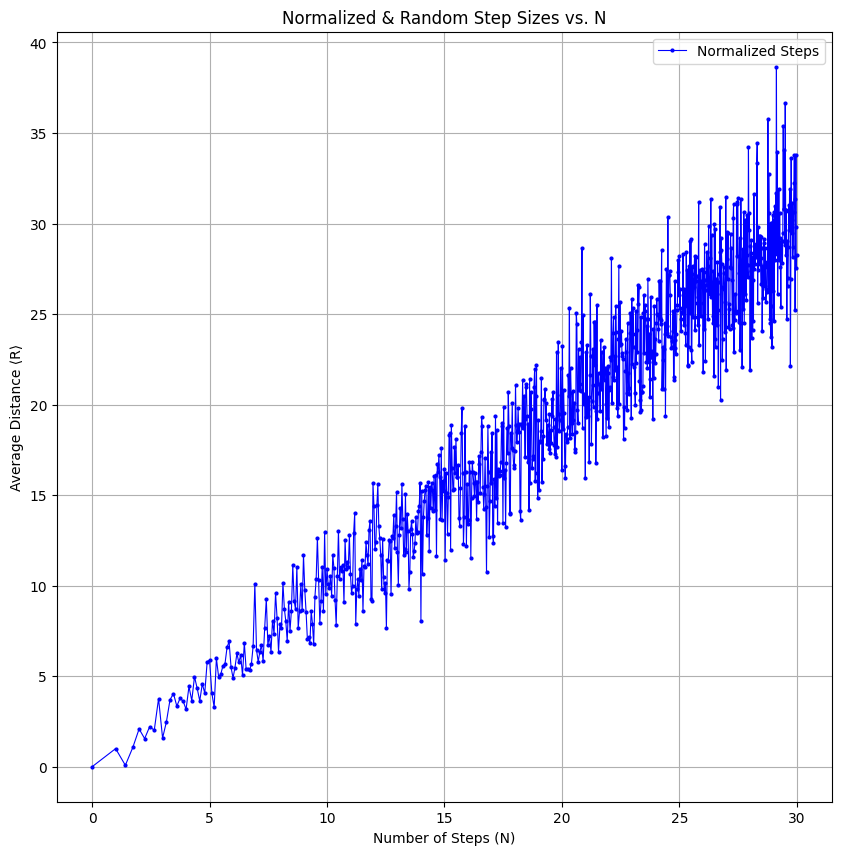

In [19]:
plt.figure(figsize=(10, 10))

plt.plot(n_val_sqrt, sqr_normalized, 'o-', label='Normalized Steps', linewidth=0.8, markersize = 2, color = 'blue')

plt.xlabel("Number of Steps (N)")
plt.ylabel("Average Distance ⟨R⟩")
plt.title("Normalized & Random Step Sizes vs. N")
plt.legend()
plt.grid(True)
plt.show()

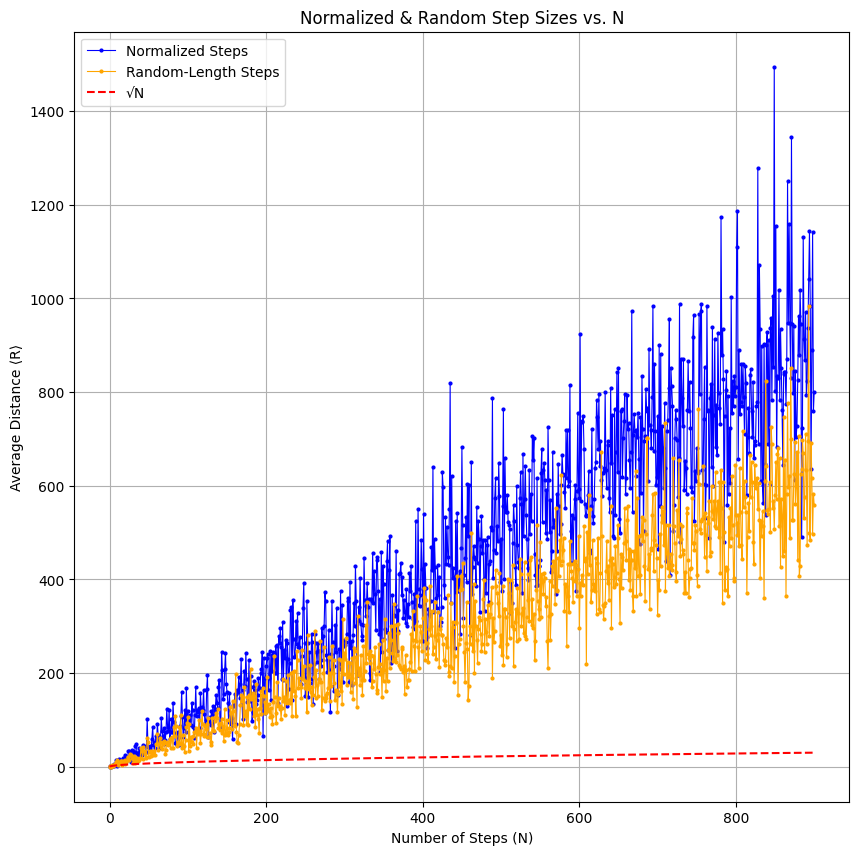

In [20]:
plt.figure(figsize=(10, 10))

plt.plot(n_val, normalized, 'o-', label='Normalized Steps', linewidth=0.8, markersize = 2, color = 'blue')
plt.plot(n_val, random, 'o-', label='Random-Length Steps', linewidth=0.8, markersize = 2, color = 'orange')
plt.plot(n_val, np.sqrt(n_val), '--', label='√N', color = 'red')

plt.xlabel("Number of Steps (N)")
plt.ylabel("Average Distance ⟨R⟩")
plt.title("Normalized & Random Step Sizes vs. N")
plt.legend()
plt.grid(True)
plt.show()

## Random Walks in N Dimensions

In [4]:
def walk_3d(aN: int, aIsNorm: bool = False) -> List:
    np.random.seed(None)
    x = np.random.uniform(-1, 1, size=aN)
    y = np.random.uniform(-1, 1, size=aN)    
    z = np.random.uniform(-1, 1, size=aN)       

    if aIsNorm:
        L = np.sqrt(x**2+y**2+z**2)
        x = x/L
        y = y/L       
        z = z/L               

    x = [np.float64(0)] + list(np.cumsum(x))
    y = [np.float64(0)] + list(np.cumsum(y))   
    z = [np.float64(0)] + list(np.cumsum(z))       
    return [x, y, z]

In [5]:
def tally_walk_distance_3d(aN: int, aIsNorm: bool = False):
    walk = walk_3d(aN, aIsNorm)
    return walk[0][-1]**2 + walk[1][-1]**2 + walk[2][-1]**2

In [6]:
def avg_walk_distance_3d(aExpN: int, aIsNorm: bool = False):
    distances = np.zeros(aExpN+1)

    for n in range(1, aExpN+1):
        k = round(math.sqrt(n))
        trials = [tally_walk_distance_3d(n, aIsNorm) for _ in range(k)]
        distances[n] = np.sum(trials)/k

    return distances

In [7]:
normalized = avg_walk_distance_3d(aExpN=N_STEP, aIsNorm = True)
n_val = np.arange(0, N_STEP+1)
n_val_sqrt = np.sqrt(n_val)

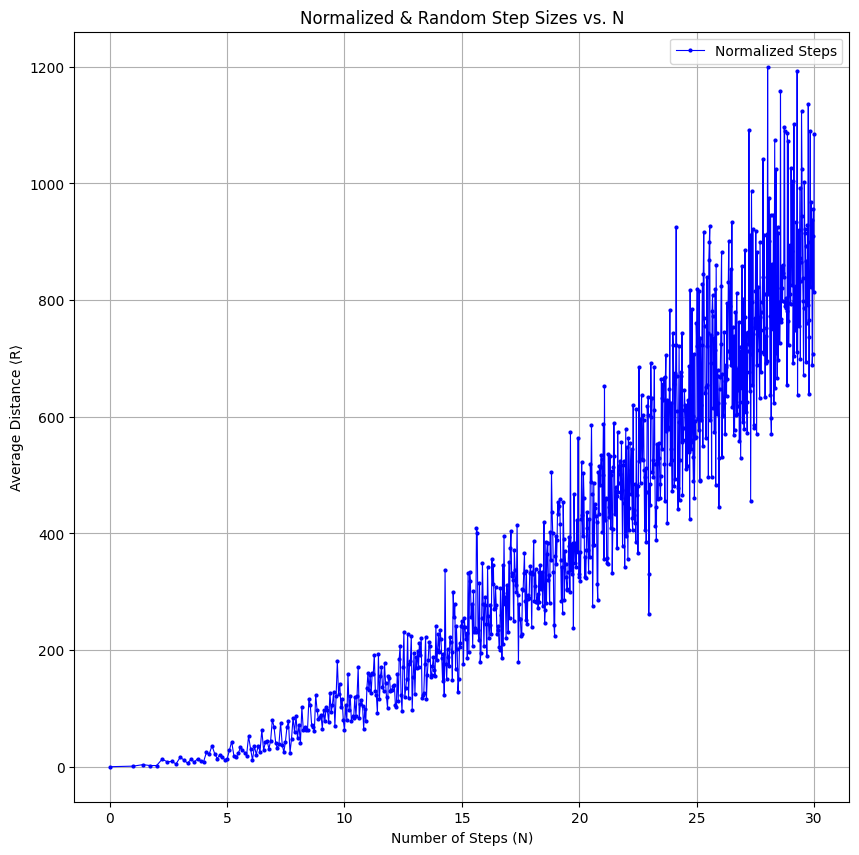

In [8]:
plt.figure(figsize=(10, 10))

plt.plot(n_val_sqrt, normalized, 'o-', label='Normalized Steps', linewidth=0.8, markersize = 2, color = 'blue')

plt.xlabel("Number of Steps (N)")
plt.ylabel("Average Distance ⟨R⟩")
plt.title("Normalized & Random Step Sizes vs. N")
plt.legend()
plt.grid(True)
plt.show()